
The HR dataset of a company has been taken to explore and understand a valid business situation - why are employees leaving the company?. This is very important for a company, because, attrition can quickly deplete a company of its best employees and drastically thin its workforce, leading to slow production or even stoppages. Of course, this is an alarming business problem!!! How can this be solved?

Just EDA may not help to solve this, supervised learning may not be able to help us to solve this problem as well. 

But.. wait.. by implementing a simple unsupervised technique, this business problem can be addressed. Below is a cluster analysis, that could be used to handle this business situation, like a piece of cake. Trust me, its very very simple. 

*This code will take you through it step-by-step.!!! Can't wait, let's jump straight into it.*

In [140]:
#importing necessary libraries (pssst.. other libraries will be imported on-the-fly)

import numpy as np 
import pandas as pd 
import seaborn as sns ; sns.set(style="darkgrid")
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore", category = FutureWarning)
%matplotlib inline


In [147]:
np.random.seed(42)

In [83]:
hr_data = pd.read_csv('HR_churn.csv')

In [84]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [85]:
hr_data.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


It can be seen very clearly that this data does not have any labels or targets, that we can use to train a supervised learning algorithm! so clearly this is an unsupervised learning problem...

Further descriptive analytics of the data

In [86]:
hr_data.shape

(14999, 10)

In [87]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Departments              14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [88]:
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


The basic data observations are done. 

No null values noted in all columns, object data type columns need to inspected. But otherwise all the numerical columns have no null values, hence the number of people who left the company are calculated below. 

In [89]:
hr_data['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [90]:
hr_data['left'].value_counts()[1]

3571

The variable hr_data['left'] == 1 shows that the person has left the company, hence we can see that **3571** people the company.

This can be viewed by visualization, but perfect numbers cannot be told thought this alone. 

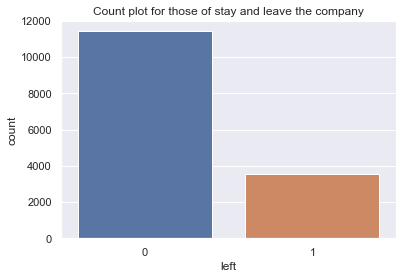

In [91]:
plt.title('Count plot for those of stay and leave the company')
sns.countplot(hr_data['left'])
plt.show();

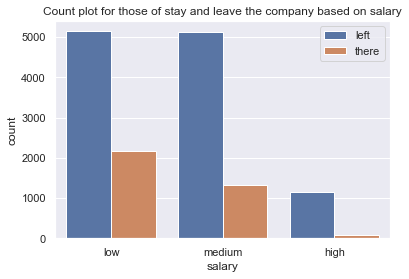

In [92]:
plt.title('Count plot for those of stay and leave the company based on salary')
ax= sns.countplot(x="salary",data=hr_data,hue="left")
ax.legend(["left","there"]);

**Now, at this stage it's valuable to understand the rate at which employees are leaving this company. This is commonly called attrition rate.**

In [93]:
attrition_rate = round((hr_data['left'].value_counts()[1])/len(hr_data),2)

In [94]:
print('The attrition rate for this company is {}%'.format(attrition_rate))

The attrition rate for this company is 0.24%


###### Making visualisations to understand the experience of the employees in the company.

The experience of the employees can be quantified by the satisfaction level they enjoy.

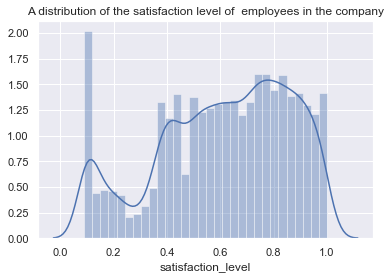

In [95]:
plt.title('A distribution of the satisfaction level of  employees in the company')
sns.distplot(hr_data['satisfaction_level']);

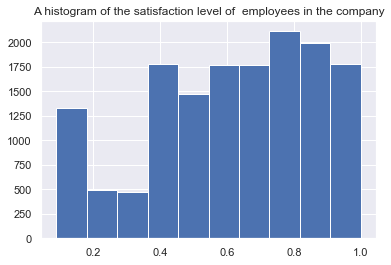

In [96]:
plt.title('A histogram of the satisfaction level of  employees in the company')
plt.hist(hr_data['satisfaction_level']);

From the two graphs above we can see that some of the empoyees are very satisfied, mediumly satisfied. A chunk of people are poorly satisfied as well. (these are just rough estimates, a graph cannot always give us the exact numbers but can be useful for a rough statistic).

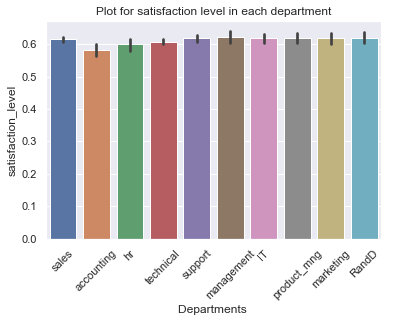

In [97]:
plt.title('Plot for satisfaction level in each department')
sns.barplot(x='Departments ',y='satisfaction_level', data=hr_data)
plt.xticks(rotation=45)
plt.show()

The satisfaction level of each department employees seems to spread across uniformly. Hence the experience of person in the company, does not differ by the department he/she is in! This is very valueable information!

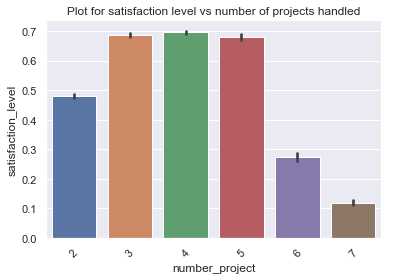

In [98]:
plt.title('Plot for satisfaction level vs number of projects handled')
sns.barplot(x='number_project',y='satisfaction_level', data=hr_data)
plt.xticks(rotation=45)
plt.show()

This plot reveals that those have worked with  3,4 or 5 project, seem to more satisfied than people who have worked in comparitively lesser or greater number of projects(2,6,7). The reasons for this can be varied, but this is a great predictor for satisfaction levels. 

Why are even bothered about a person's experince in this company? Well, a bad experience can cause an employee to quit, thereby causing putting the employer at risk, when the rate of employee turnover is large. 

Hence it is important to understand why these employees leave and can clustering reveal something about them?

KMeans algorithm is a very popular unsupervised technique, let us see what KMeans can do for us. 

###### 	Performing K-means clustering on the employees who left based on satisfaction level and last evaluation

In [105]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [112]:
# performing kmeans on those employees who left

hr_data_left = hr_data[hr_data['left']==1]

In [113]:
hr_data_left.shape

(3571, 10)

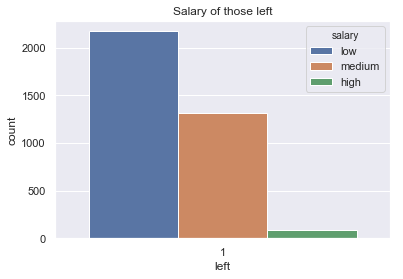

In [129]:
plt.title('Salary of those left')
sns.countplot(x='left',hue='salary',data=hr_data_left);

many who had very low salary had left the company, very few people with higher salary had left.

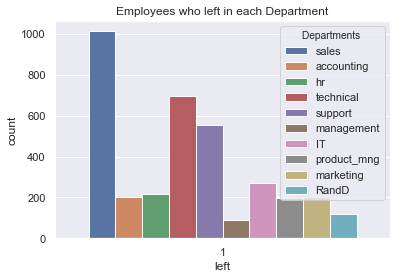

In [135]:
plt.title('Employees who left in each Department')
sns.countplot(x='left',hue='Departments ',data=hr_data_left);

Many of them who belonged to the sales department left the company.. significant amount of people from technical and support also left the company.. 

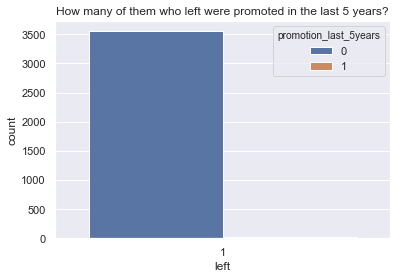

In [137]:
plt.title('How many of them who left were promoted in the last 5 years?')
sns.countplot(x='left',hue='promotion_last_5years',data=hr_data_left);

In [133]:
hr_data_left['promotion_last_5years'].value_counts()

0    3552
1      19
Name: promotion_last_5years, dtype: int64

This shows that, of those who left, many left the company because of no promotions.

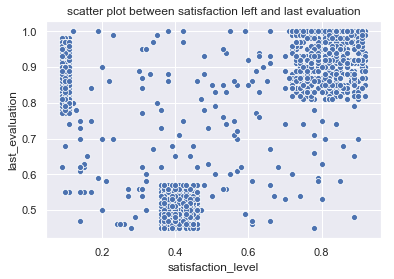

In [116]:
plt.title('scatter plot between satisfaction left and last evaluation')
sns.scatterplot(hr_data_left['satisfaction_level'],y=hr_data_left['last_evaluation'])
plt.show()

Woahhhh!!!!! we can immediately see 3 clusters, there is some pattern in this data....

taking only satisfaction level and last evaluation as X (as vectors)

In [119]:
X_left = hr_data_left.iloc[:,[0,1]].values
X_left = sc.fit_transform(X_left)

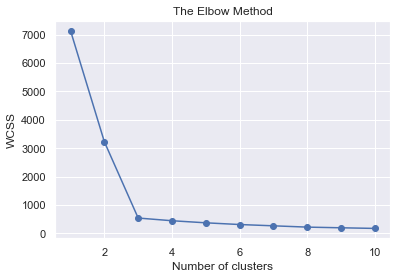

In [120]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_left)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

It is clearly evident that the number of clusters is 3. 

In [121]:
# fitting kmeans to the dataset with 3 clusters/centroids

kmeans_left = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans_left = kmeans_left.fit_predict(X_left)

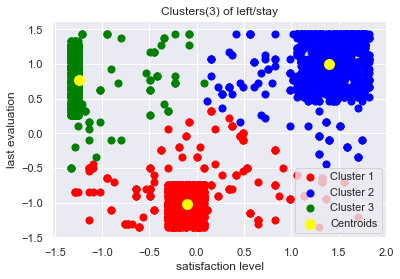

In [122]:
# Visualizing the clusters
plt.scatter(X_left[y_kmeans_left == 0, 0], X_left[y_kmeans_left == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X_left[y_kmeans_left == 1, 0], X_left[y_kmeans_left == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X_left[y_kmeans_left == 2, 0], X_left[y_kmeans_left == 2, 1], s = 50, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans_left.cluster_centers_[:, 0], kmeans_left.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')

plt.title('Clusters(3) of left/stay')
plt.xlabel('satisfaction level')
plt.ylabel('last evaluation')
plt.legend()
plt.show()

**Cluster 1**:more of less satisfied employees with very less scores in last evaluation although there are a few who got better scores of have better satisfaction level, but these are the ones mostly fed up with the last evalution score, hence they left the company. We can call them, less performing employees. some kind of training program could be arranged.

**Cluster 2**: These are mostly those who have high scores in the last evaluation and also those who have better satisfaction level. The reason for them leaving the company needs to addressed. We can term them as, employees who left for other reasons (other than satisfaction level and evaluation scores). Salary could be revised. 

**Cluster 3**: These are people those who had high evaluation scores, but very less satisfaction. This group can be called as the sensitive employee group, because they have a concern that needs to address although they perform well. This group needs most attention. Additional bonuses could be given

###### Inferences

Finally we can see that there are 3 groups of people in the company that leave- underperfoming(red), left for other reasons(blue) and sensitive employees(green). Hence it is important to address each group according to the behaviors of the groups as mentioned above. 


It can be seen that, from no where, we ended up creating a business solution with cluster analysis. Clustering can reveal to us patterns that may not be immediately apparent. Now as a Data Scientist we can present this solution to the Company's Administration, that could solve their employee attrition problems!!! Many other business problems like this can be address using clustering.!!